### Reinforcement Learning

Reinforcement learning is a goal oriented learning method based on interaction with its environment. The objective is of getting an agent to act in an environment in order to maximize its rewards. Here the agent is an intelligent program, environment is the external condition. 

Reinforcement learning is like teaching your dog a trick. For example, consider teaching a dog a new trick, you cannot tell it what to do, but you can reward or punish it if it does the right or wrong thing respectively. It has to figure out what it did that made it get the reward or punishment, which is known as the credit assignment problem. We can use a similar method to train computers to do many tasks, such as playing chess or any other games, scheduling jobs, and controlling robot limbs.

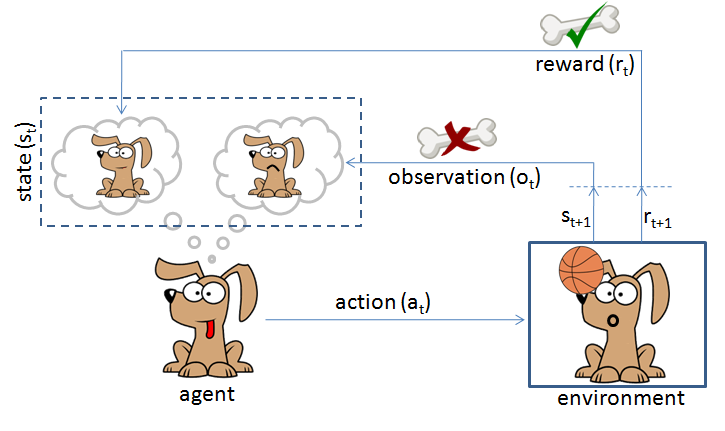

In [1]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/Reinforcement_Learning.png', width=600)

According to the paper publish by Deepmind Technologies in 2013, Q-learning rule for updating status is given by:
#### Q[s,a]new = Q[s,a]prev + α * (r + ƴ*max(s,a) – Q[s,a]prev), where

* α is the learning rate, 
* r is reward for latest action, 
* ƴ is the discounted factor, and
* max(s,a) is the estimate of new value from best action. 

If the optimal value Q[s,a] of the sequence s’ at the next time step was known for all possible actions a’, then the optimal strategy is to select the action a’ maximizing the expected value of r + ƴ*max(s,a) – Q[s,a]prev.

### Example
Let’s consider an example where an agent is trying to come out of a maze. It can move one random square or area in any direction, and get a reward if exits.  The most common way to formalize a reinforcement problem is to represent it as Markov decision process. Assume the agent is in state b (maze area) and the target is to reach state f. So within one step agent can reach from b to f, let’s put a reward of 100 (otherwise 0) for links between nodes that allows agents to reach target state. 

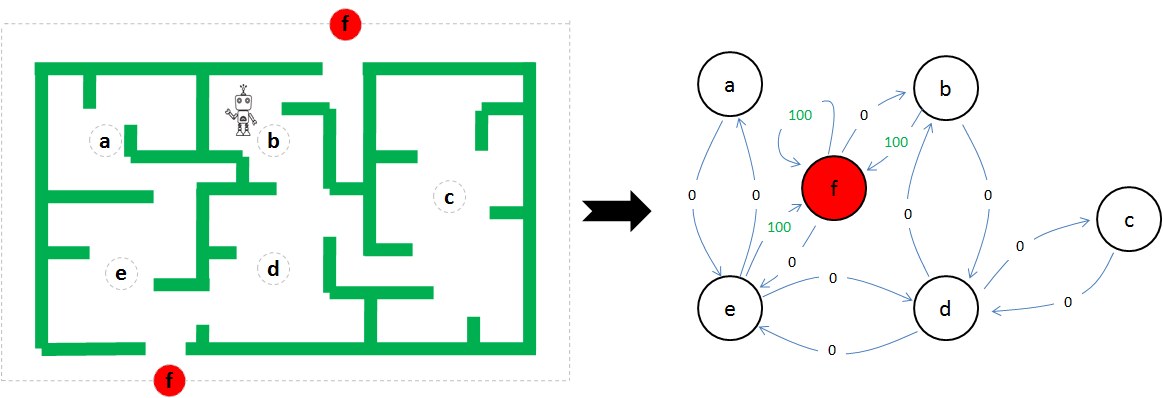

In [2]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/Maze_Markov.png', width=800)

In [26]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# defines the reward/link connection graph
R = np.matrix([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]])
Q = np.zeros_like(R)

The -1's in the table means there isn't a link between nodes. For example, State 'a' cannot go to State 'b'.

In [35]:
# learning parameter
gamma = 0.8

# Initialize random_state
initial_state = randint(0,4)

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value    

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act) 

### Training

In [36]:
# Train over 100 iterations, re-iterate the process above).
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print "Trained Q matrix: \n", Q/np.max(Q)*100

Trained Q matrix: 
[[  0   0   0   0   0   0]
 [  0   0   0   0   0 100]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0 100]]


### Testing

In [37]:
current_state = 2
steps = [current_state]

while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print "Best sequence path: ", steps

Best sequence path:  [2, 3, 1, 5]
